In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
start = '2017-01-01'
atvi = pdr.get_data_yahoo('ATVI')[start:]
ea = pdr.get_data_yahoo('EA')[start:]

In [3]:
atvi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,36.439999,36.790001,36.180000,36.639999,36.417038,8360600
2017-01-04,36.770000,37.529999,36.639999,37.360001,37.132656,7643000
2017-01-05,37.500000,38.270000,37.389999,37.939999,37.709126,9814400
2017-01-06,37.950001,38.189999,37.820000,37.910000,37.679310,8364900
2017-01-09,38.090000,38.160000,37.369999,37.700001,37.470589,5432400


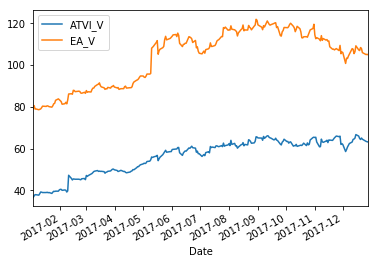

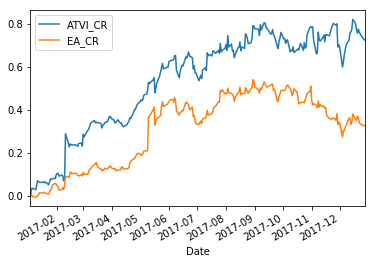

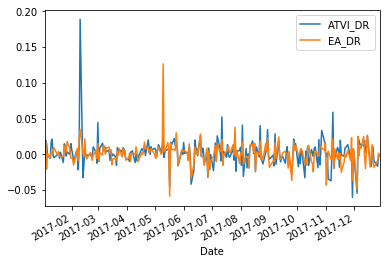

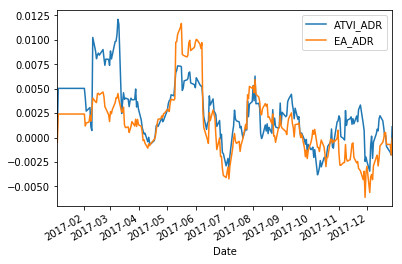

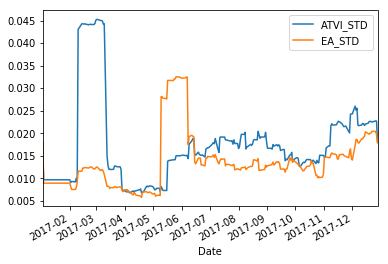

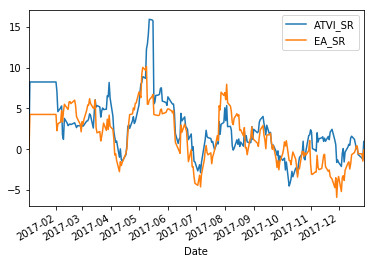

In [4]:
def v(df):
    return df['Close']

def cr(df):
    return df['Close'] / df['Close'].iloc[0] - 1

def dr(df):
    dr_ = df['Close'].iloc[1:] / df['Close'][:-1].values - 1
    dr_.loc[datetime.datetime(2017, 1, 3)] = 0
    return dr_

def adr(df):
    return dr(df).rolling(20).mean().fillna(method='bfill')

def std(df):
    return dr(df).rolling(20).std().fillna(method='bfill')

def sr(df):
    return np.sqrt(252) * adr(df) / std(df)

df0 = pd.DataFrame(data={
    'ATVI_V': v(atvi),
    'ATVI_CR': cr(atvi),
    'ATVI_DR': dr(atvi),
    'ATVI_ADR': adr(atvi),
    'ATVI_STD': std(atvi),
    'ATVI_SR': sr(atvi),
    'EA_V': v(ea),
    'EA_CR': cr(ea),
    'EA_DR': dr(ea),
    'EA_ADR': adr(ea),
    'EA_STD': std(ea),
    'EA_SR': sr(ea)
})

df0[['ATVI_V', 'EA_V']].plot()
df0[['ATVI_CR', 'EA_CR']].plot()
df0[['ATVI_DR', 'EA_DR']].plot()
df0[['ATVI_ADR', 'EA_ADR']].plot()
df0[['ATVI_STD', 'EA_STD']].plot()
df0[['ATVI_SR', 'EA_SR']].plot()
plt.show()

In [5]:
len(df0[df0['ATVI_SR'] > df0['EA_SR']]), len(df0[df0['ATVI_SR'] < df0['EA_SR']])

(169, 81)